In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import joblib

In [130]:
# pip install feature_engine

In [131]:
df = pd.read_csv("disaster_cleaned.csv")

In [132]:
df.shape

(2992, 15)

In [133]:
df.sample()

,date,event_name,continent,country_code,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,condition,event_type
583,10-05-2024,CENTRAL ALASKA,nar,USA,64.9911,-146.8799,4.0,8.1,0.7,66,10.8,0.0,2,Overcast,EQ


In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df

,date,event_name,continent,country_code,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,condition,event_type
0,05-09-2024,NORTHERN ALASKA,nar,USA,65.881200,-152.217900,0.6,3.0,-3.1,97,8.3,0.03,1,Light snow,EQ
1,05-09-2024,"Drought in Guatemala, Honduras, Mexico, Nicaragua",nar,MEX,18.500000,-99.000000,28.2,36.6,20.0,31,21.2,1.85,8,Patchy rain possible,DR
2,05-09-2024,Drought in Canada,nar,CAN,53.500000,-116.000000,12.8,22.2,3.8,46,15.1,0.00,6,Sunny,DR
3,04-09-2024,CALIFORNIA-NEVADA BORDER REGION,nar,USA,36.523300,-115.540000,13.5,20.1,6.8,24,15.8,0.00,6,Sunny,EQ
4,04-09-2024,CENTRAL CALIFORNIA,nar,USA,37.282500,-119.999000,14.8,21.5,8.8,61,8.3,0.00,6,Sunny,EQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,09-10-2024,Wildfire in Australia 1022015,aus,AUS,-15.348515,133.938843,27.7,36.1,19.4,34,24.8,0.00,10,Partly cloudy,WF
2988,09-08-2024,Wildfire in Australia 1022114,aus,AUS,-16.035644,136.440754,25.2,33.4,19.7,60,33.5,0.00,9,Sunny,WF
2989,09-08-2024,Wildfire in Australia 1022034,aus,AUS,-15.354934,131.140822,28.4,37.0,19.8,38,23.0,0.00,10,Sunny,WF
2990,15-08-2024,Flood in Maldives,ocean,MDV,3.281714,73.247658,27.5,27.8,27.3,78,36.7,9.30,6,Light rain shower,FL


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2992 non-null   object 
 1   event_name       2992 non-null   object 
 2   continent        2992 non-null   object 
 3   country_code     2992 non-null   object 
 4   latitude         2992 non-null   float64
 5   longitude        2992 non-null   float64
 6   temperature      2992 non-null   float64
 7   max_temperature  2992 non-null   float64
 8   min_temperature  2992 non-null   float64
 9   humidity         2992 non-null   int64  
 10  wind_speed       2992 non-null   float64
 11  precipitation    2992 non-null   float64
 12  uv_index         2992 non-null   int64  
 13  condition        2992 non-null   object 
 14  event_type       2992 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 350.8+ KB


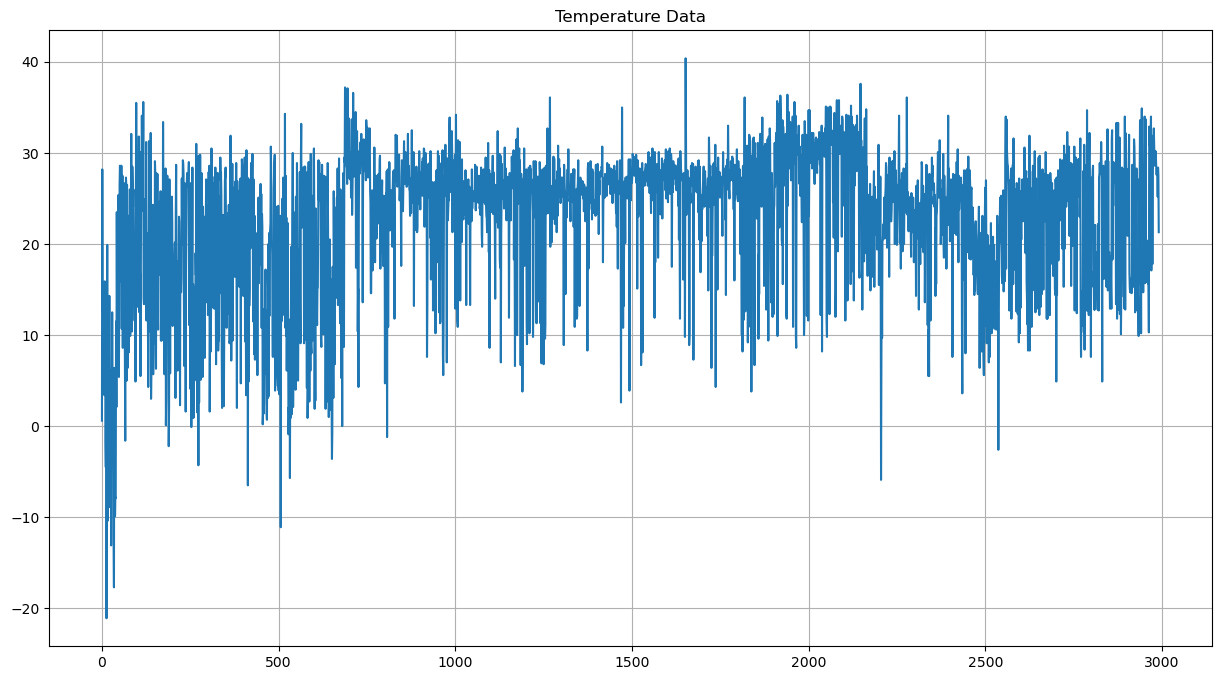

In [137]:
plt.figure(figsize=(15, 8))  # Set the figure size to 15 inches by 8 inches
plt.plot(df['temperature'])
plt.title('Temperature Data')
plt.grid(True)
plt.show()

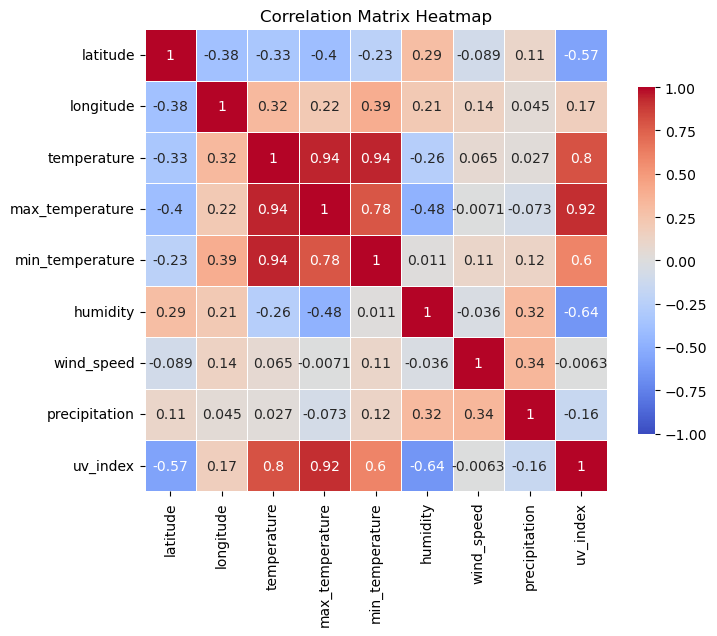

In [138]:
numeric_df = df.select_dtypes(include=['number']).dropna()
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.title("Correlation Matrix Heatmap")
plt.show()

In [139]:
df = df.drop('event_name',axis=1)

In [140]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2992 non-null   datetime64[ns]
 1   continent        2992 non-null   object        
 2   country_code     2992 non-null   object        
 3   latitude         2992 non-null   float64       
 4   longitude        2992 non-null   float64       
 5   temperature      2992 non-null   float64       
 6   max_temperature  2992 non-null   float64       
 7   min_temperature  2992 non-null   float64       
 8   humidity         2992 non-null   int64         
 9   wind_speed       2992 non-null   float64       
 10  precipitation    2992 non-null   float64       
 11  uv_index         2992 non-null   int64         
 12  condition        2992 non-null   object        
 13  event_type       2992 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(

In [141]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df = df.drop('date', axis=1)

In [142]:
df.head(2)

,continent,country_code,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,condition,event_type,year,month,day
0,nar,USA,65.8812,-152.2179,0.6,3.0,-3.1,97,8.3,0.03,1,Light snow,EQ,2024,5,9
1,nar,MEX,18.5000,-99.0000,28.2,36.6,20.0,31,21.2,1.85,8,Patchy rain possible,DR,2024,5,9


In [143]:
#df.to_csv("data.csv",index=False)

In [144]:
label_encoder = LabelEncoder()
df['event_type_encoded'] = label_encoder.fit_transform(df['event_type'])
y = df['event_type_encoded']
y

0       1
1       0
2       0
3       1
4       1
       ..
2987    9
2988    9
2989    9
2990    3
2991    1
Name: event_type_encoded, Length: 2992, dtype: int32

In [145]:
df.sample()

,continent,country_code,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,condition,event_type,year,month,day,event_type_encoded
1396,asia,IND,25.783379,86.937144,23.9,24.4,23.3,97,27.0,62.03,5,Moderate or heavy rain shower,SW,2024,9,27,5


In [146]:
X=df.iloc[:,2:16]

In [147]:
X = X.drop(['condition','event_type'], axis=1)

In [148]:
X

,latitude,longitude,temperature,max_temperature,min_temperature,humidity,wind_speed,precipitation,uv_index,year,month,day
0,65.881200,-152.217900,0.6,3.0,-3.1,97,8.3,0.03,1,2024,5,9
1,18.500000,-99.000000,28.2,36.6,20.0,31,21.2,1.85,8,2024,5,9
2,53.500000,-116.000000,12.8,22.2,3.8,46,15.1,0.00,6,2024,5,9
3,36.523300,-115.540000,13.5,20.1,6.8,24,15.8,0.00,6,2024,4,9
4,37.282500,-119.999000,14.8,21.5,8.8,61,8.3,0.00,6,2024,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...
2987,-15.348515,133.938843,27.7,36.1,19.4,34,24.8,0.00,10,2024,9,10
2988,-16.035644,136.440754,25.2,33.4,19.7,60,33.5,0.00,9,2024,9,8
2989,-15.354934,131.140822,28.4,37.0,19.8,38,23.0,0.00,10,2024,9,8
2990,3.281714,73.247658,27.5,27.8,27.3,78,36.7,9.30,6,2024,8,15


In [149]:
y

0       1
1       0
2       0
3       1
4       1
       ..
2987    9
2988    9
2989    9
2990    3
2991    1
Name: event_type_encoded, Length: 2992, dtype: int32

In [150]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(2992, 12)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [108]:
dt_classifier = DecisionTreeClassifier(random_state=42,criterion='gini',
    splitter='best',
    max_depth=7)

dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:",dt_accuracy)

Decision Tree Accuracy: 0.7171492204899778


In [109]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.48      0.58      0.52        52
           1       0.82      0.79      0.81       279
           2       0.00      0.00      0.00        13
           3       0.58      0.19      0.29        72
           4       0.74      0.62      0.67        63
           5       0.67      0.89      0.76       181
           6       0.33      0.28      0.30        25
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.77      0.83      0.80       208

    accuracy                           0.72       898
   macro avg       0.44      0.42      0.42       898
weighted avg       0.70      0.72      0.70       898



C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


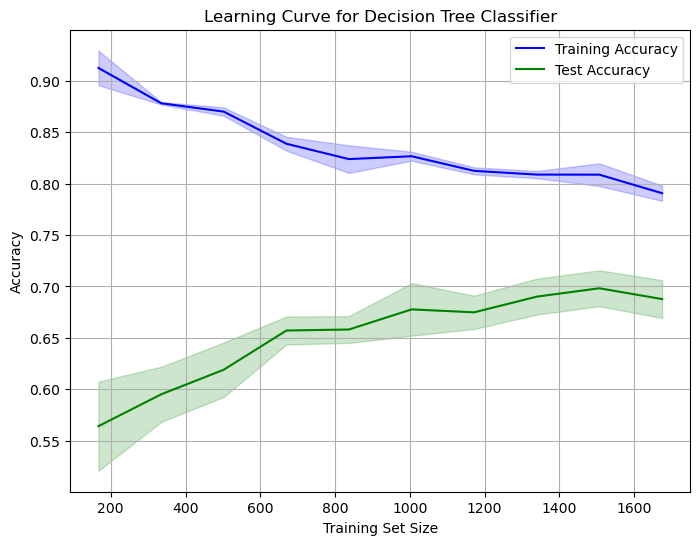

In [110]:
train_sizes, train_scores, test_scores = learning_curve(
    dt_classifier, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5,                                 
    scoring='accuracy',                  
    n_jobs=-1                       
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Test Accuracy", color="green")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Learning Curve for Decision Tree Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [100]:
knn_classifier = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='auto')

knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

KNN Accuracy: 69.38%


In [101]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.47      0.38      0.42        52
           1       0.77      0.84      0.80       279
           2       0.22      0.15      0.18        13
           3       0.43      0.26      0.33        72
           4       0.56      0.59      0.57        63
           5       0.66      0.77      0.71       181
           6       0.38      0.20      0.26        25
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.80      0.81      0.80       208

    accuracy                           0.69       898
   macro avg       0.43      0.40      0.41       898
weighted avg       0.67      0.69      0.68       898



C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


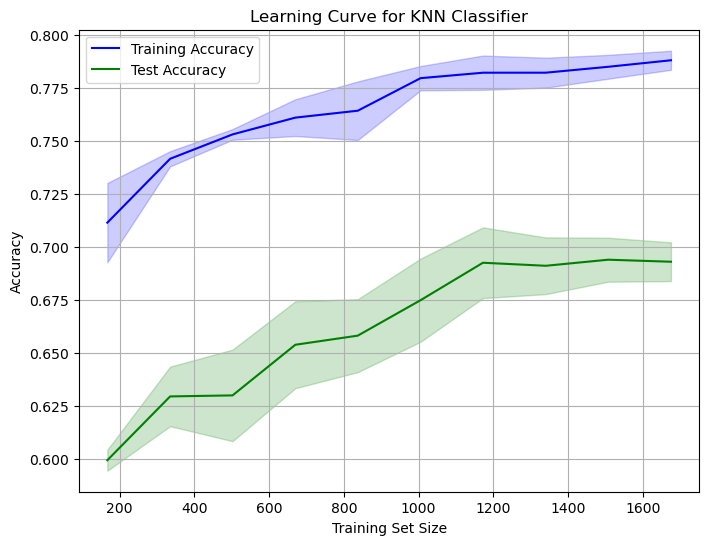

In [102]:
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),  
    cv=5,                                  
    scoring='accuracy',                 
    n_jobs=-1                             
)

# Calculate the mean and standard deviation for train and test scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Test Accuracy", color="green")

# Plot the fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

# Label the axes and show the plot
plt.title("Learning Curve for KNN Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [199]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random forest:",accuracy)

Random forest: 0.7628062360801782


In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.42      0.55        52
           1       0.78      0.95      0.85       279
           2       0.00      0.00      0.00        13
           3       0.85      0.24      0.37        72
           4       0.70      0.52      0.60        63
           5       0.70      0.95      0.81       181
           6       0.55      0.24      0.33        25
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.83      0.82      0.82       208

    accuracy                           0.76       898
   macro avg       0.52      0.41      0.43       898
weighted avg       0.75      0.76      0.73       898



C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


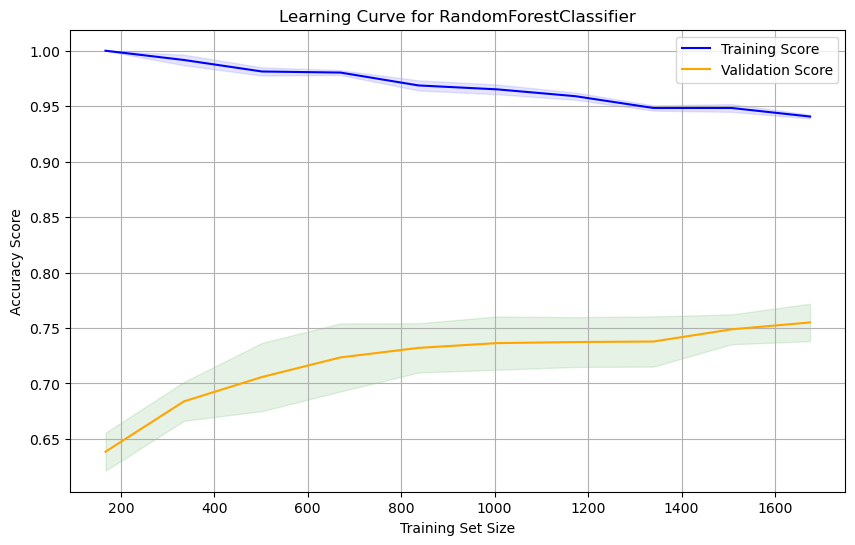

In [201]:
train_sizes, train_scores, val_scores = learning_curve(
    clf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Validation Score", color="orange")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="green")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for RandomForestClassifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [202]:
def predict_event_type(latitude, longitude, temperature, max_temp,min_temp, humidity, wind_speed, precipitation, uv_index,year,month,day):
    user_input = [[temperature, humidity, min_temp, max_temp, precipitation, wind_speed, latitude, longitude, uv_index,year,month,day]]
    user_input_scaled = scaler.transform(user_input)
    encoded_prediction = clf.predict(user_input_scaled)
    decoded_prediction = label_encoder.inverse_transform([int(encoded_prediction)])
    return decoded_prediction[0]

predicted_event = predict_event_type(14.5,-99,28.2,30.6,3.0,21,21.2,1.15,8,2024,12,12)
print("Predicted event type:", predicted_event)

Predicted event type: EQ


C:\Users\infor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [183]:
log_reg = LogisticRegression(solver='liblinear',random_state=42)

log_reg.fit(X_train, y_train)

log_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, log_pred)
print("Accuracy:",accuracy)

conf_matrix = confusion_matrix(y_test, log_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.6080178173719376
Confusion Matrix:


array([[  0,  29,   0,   0,   1,   7,   0,   0,   0,  15],
       [  0, 188,   0,   0,   2,  49,   0,   0,   0,  40],
       [  0,   0,   0,   0,   0,  12,   0,   0,   0,   1],
       [  0,  28,   0,   0,   0,  41,   0,   0,   0,   3],
       [  0,   2,   0,   0,  24,   8,   0,   0,   0,  29],
       [  0,  16,   1,   0,   4, 158,   0,   0,   0,   2],
       [  0,  11,   0,   0,   0,  14,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   1,   2,   0,   0,   0,   0],
       [  0,  27,   0,   0,   3,   2,   0,   0,   0, 176]], dtype=int64)

In [114]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.62      0.67      0.65       279
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        72
           4       0.69      0.38      0.49        63
           5       0.54      0.87      0.67       181
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         4
           9       0.66      0.85      0.74       208

    accuracy                           0.61       898
   macro avg       0.25      0.28      0.25       898
weighted avg       0.50      0.61      0.54       898



C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\infor\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


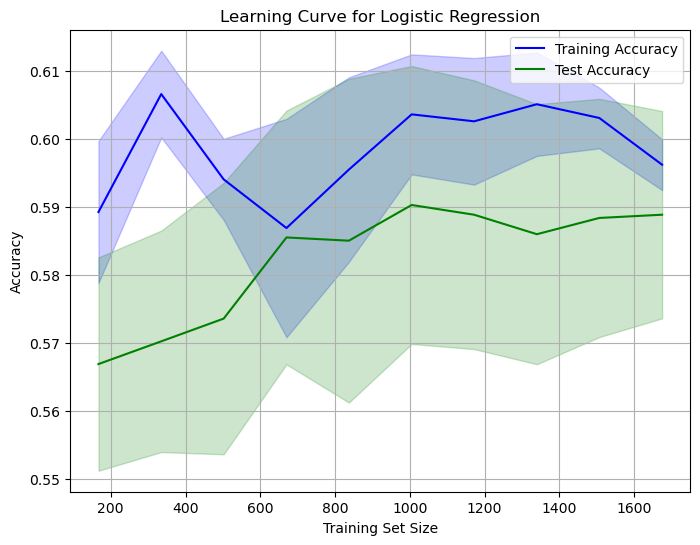

In [115]:
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X_train, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,                                  
    scoring='accuracy',                    
    n_jobs=-1                             
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Test Accuracy", color="green")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [122]:
model = SVC(kernel='linear', random_state=42,C=0.1,gamma=0.1,degree=5,shrinking=False,class_weight=None)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

Accuracy: 0.6369710467706013
Confusion Matrix:


array([[  2,  29,   0,   0,   1,   5,   0,   0,   0,  15],
       [  2, 218,   0,   0,   2,  38,   0,   0,   0,  19],
       [  0,   1,   0,   0,   0,  12,   0,   0,   0,   0],
       [  0,  29,   0,   0,   0,  42,   0,   0,   0,   1],
       [  0,   5,   0,   0,  27,   7,   0,   0,   0,  24],
       [  0,  14,   0,   0,   4, 162,   0,   0,   0,   1],
       [  0,  10,   0,   0,   0,  15,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0,  38,   0,   0,   7,   0,   0,   0,   0, 163]], dtype=int64)

C:\Users\infor\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


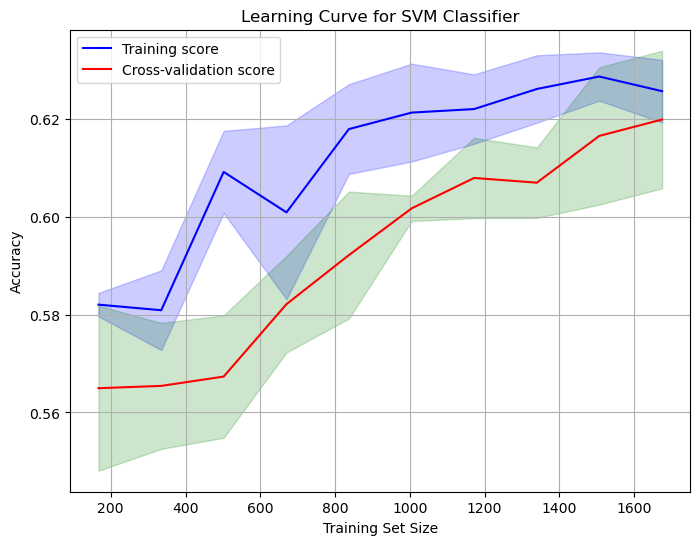

In [124]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, 
    X=X_train, 
    y=y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,                                 
    n_jobs=-1                           
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='red')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

plt.title('Learning Curve for SVM Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [125]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.300631,-0.191364,0.273670,0.110880,0.502518,1.211253,-0.985287,0.114774,-0.344815,0.0,0.263103,0.006288
1,0.628046,1.215662,0.502029,0.042400,0.849551,0.520622,2.318067,0.034093,-0.344815,0.0,0.263103,0.722034
2,0.288148,-1.180506,0.616208,0.042400,1.060250,0.926875,3.327901,0.656427,-0.344815,0.0,0.898456,-0.811707
3,0.887451,0.052561,-0.081556,0.167947,-0.303095,-1.266896,-0.061032,-0.296613,0.118032,0.0,0.263103,1.335530
4,-1.432038,-0.852357,0.641581,0.829924,0.304213,-0.291886,0.315516,-0.277704,1.043728,0.0,0.898456,-0.811707
...,...,...,...,...,...,...,...,...,...,...,...,...
2089,-0.012557,1.060732,0.717701,0.270667,1.097432,0.683123,-0.429023,-0.253752,-0.344815,0.0,0.898456,-1.527452
2090,0.461157,0.677701,-0.436781,-0.767951,-0.129578,1.455006,-1.293372,0.655587,-0.807663,0.0,0.263103,1.028782
2091,0.848091,0.932430,-0.195735,-0.117388,-0.154366,-0.657515,-0.146611,-0.296613,0.118032,0.0,0.263103,0.926532
2092,0.379366,1.062217,0.857254,0.236427,1.332919,0.479996,-0.429023,-0.156683,-0.344815,0.0,0.263103,-0.913956


In [203]:
joblib.dump(clf,"model.joblib")

['model.joblib']

In [204]:
saved_model = joblib.load("model.joblib")
saved_model

RandomForestClassifier(max_depth=10, random_state=42)

In [205]:
y_pred = saved_model.predict(X_test)
r2_score(y_test,y_pred)

0.4452556171990739